# Mr Python's Lightning Talk on TKinter

## Examples of Implementation

### game_of_life_example.py

In [ ]:
import tkinter as tk
import random

class GameOfLife:
    def __init__(self, master, rows, cols, cell_size):
        self.master = master
        self.rows = rows
        self.cols = cols
        self.cell_size = cell_size
        self.grid = self.create_initial_grid()
        self.canvas = tk.Canvas(master, width=cols * cell_size, height=rows * cell_size, bg="white")
        self.canvas.pack()
        self.draw_grid()
        self.running = False

        # Add control buttons (e.g., start, stop, reset)
        start_button = tk.Button(master, text="Start", command=self.start_simulation)
        start_button.pack(side=tk.LEFT)
        stop_button = tk.Button(master, text="Stop", command=self.stop_simulation)
        stop_button.pack(side=tk.LEFT)

    def create_initial_grid(self):
        # Initialize grid with random alive/dead cells
        grid = [[random.choice([0, 1]) for _ in range(self.cols)] for _ in range(self.rows)]
        return grid

    def draw_grid(self):
        self.canvas.delete("all")
        for r in range(self.rows):
            for c in range(self.cols):
                x1, y1 = c * self.cell_size, r * self.cell_size
                x2, y2 = x1 + self.cell_size, y1 + self.cell_size
                color = "black" if self.grid[r][c] == 1 else "white"
                self.canvas.create_rectangle(x1, y1, x2, y2, fill=color, outline="gray")

    def update_grid(self):
        new_grid = [[0 for _ in range(self.cols)] for _ in range(self.rows)]
        for r in range(self.rows):
            for c in range(self.cols):
                live_neighbors = self.count_live_neighbors(r, c)
                if self.grid[r][c] == 1:  # Alive cell
                    if live_neighbors < 2 or live_neighbors > 3:
                        new_grid[r][c] = 0  # Dies
                    else:
                        new_grid[r][c] = 1  # Survives
                else:  # Dead cell
                    if live_neighbors == 3:
                        new_grid[r][c] = 1  # Becomes alive
        self.grid = new_grid
        self.draw_grid()

    def count_live_neighbors(self, r, c):
        count = 0
        for i in range(-1, 2):
            for j in range(-1, 2):
                if i == 0 and j == 0:
                    continue
                neighbor_r, neighbor_c = r + i, c + j
                if 0 <= neighbor_r < self.rows and 0 <= neighbor_c < self.cols:
                    count += self.grid[neighbor_r][neighbor_c]
        return count

    def start_simulation(self):
        self.running = True
        self.run_generation()

    def stop_simulation(self):
        self.running = False

    def run_generation(self):
        if self.running:
            self.update_grid()
            self.master.after(100, self.run_generation) # Schedule next update after 100ms

if __name__ == "__main__":
    root = tk.Tk()
    root.title("Conway's Game of Life")
    game = GameOfLife(root, rows=50, cols=50, cell_size=10)
    root.mainloop()

### Everything Bagel
This example uses a fork of tkinter called ttkbootstrap but is essentially the same with some slight modifications for buttons

In [ ]:
import ttkbootstrap as ttk
from ttkbootstrap.constants import *


def setup_demo(master):

    ZEN = """Beautiful is better than ugly. 
Explicit is better than implicit. 
Simple is better than complex. 
Complex is better than complicated.
Flat is better than nested. 
Sparse is better than dense.  
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!"""

    root = ttk.Frame(master, padding=10)
    style = ttk.Style()
    theme_names = style.theme_names()

    theme_selection = ttk.Frame(root, padding=(10, 10, 10, 0))
    theme_selection.pack(fill=X, expand=YES)

    theme_selected = ttk.Label(
        master=theme_selection, 
        text="litera", 
        font="-size 24 -weight bold"
    )
    theme_selected.pack(side=LEFT)

    lbl = ttk.Label(theme_selection, text="Select a theme:")
    theme_cbo = ttk.Combobox(
        master=theme_selection,
        text=style.theme.name,
        values=theme_names,
    )
    theme_cbo.pack(padx=10, side=RIGHT)
    theme_cbo.current(theme_names.index(style.theme.name))
    lbl.pack(side=RIGHT)

    ttk.Separator(root).pack(fill=X, pady=10, padx=10)

    def change_theme(e):
        t = cbo.get()
        style.theme_use(t)
        theme_selected.configure(text=t)
        theme_cbo.selection_clear()    
        default.focus_set()

    theme_cbo.bind('<<ComboboxSelected>>', change_theme)

    lframe = ttk.Frame(root, padding=5)
    lframe.pack(side=LEFT, fill=BOTH, expand=YES)

    rframe = ttk.Frame(root, padding=5)
    rframe.pack(side=RIGHT, fill=BOTH, expand=YES)

    color_group = ttk.Labelframe(
        master=lframe,
        text="Theme color options",
        padding=10
    )
    color_group.pack(fill=X, side=TOP)

    for color in style.colors:
        cb = ttk.Button(color_group, text=color, bootstyle=color)
        cb.pack(side=LEFT, expand=YES, padx=5, fill=X)

    rb_group = ttk.Labelframe(
        lframe, text="Checkbuttons & radiobuttons", padding=10)
    rb_group.pack(fill=X, pady=10, side=TOP)

    check1 = ttk.Checkbutton(rb_group, text="selected")
    check1.pack(side=LEFT, expand=YES, padx=5)
    check1.invoke()
    
    check2 = ttk.Checkbutton(rb_group, text="deselected")
    check2.pack(side=LEFT, expand=YES, padx=5)
    
    check3 = ttk.Checkbutton(rb_group, text="disabled", state=DISABLED)
    check3.pack(side=LEFT, expand=YES, padx=5)

    radio1 = ttk.Radiobutton(rb_group, text="selected", value=1)
    radio1.pack(side=LEFT, expand=YES, padx=5)
    radio1.invoke()
    
    radio2 = ttk.Radiobutton(rb_group, text="deselected", value=2)
    radio2.pack(side=LEFT, expand=YES, padx=5)
    
    radio3 = ttk.Radiobutton(
        master=rb_group, 
        text="disabled",
        value=3, 
        state=DISABLED
    )
    radio3.pack(side=LEFT, expand=YES, padx=5)

    ttframe = ttk.Frame(lframe)
    ttframe.pack(pady=5, fill=X, side=TOP)

    table_data = [
        ('South Island, New Zealand', 1),
        ('Paris', 2),
        ('Bora Bora', 3),
        ('Maui', 4),
        ('Tahiti', 5)
    ]

    tv = ttk.Treeview(
        master=ttframe,
        columns=[0, 1],
        show=HEADINGS,
        height=5
    )
    for row in table_data:
        tv.insert('', END, values=row)

    tv.selection_set('I001')
    tv.heading(0, text='City')
    tv.heading(1, text='Rank')
    tv.column(0, width=300)
    tv.column(1, width=70, anchor=CENTER)
    tv.pack(side=LEFT, anchor=NE, fill=X)

    # # notebook with table and text tabs
    nb = ttk.Notebook(ttframe)
    nb.pack(
        side=LEFT,
        padx=(10, 0),
        expand=YES,
        fill=BOTH
    )
    nb_text = "This is a notebook tab.\nYou can put any widget you want here."
    nb.add(ttk.Label(nb, text=nb_text), text="Tab 1", sticky=NW)
    nb.add(
        child=ttk.Label(nb, text="A notebook tab."),
        text="Tab 2",
        sticky=NW
    )
    nb.add(ttk.Frame(nb), text='Tab 3')
    nb.add(ttk.Frame(nb), text='Tab 4')
    nb.add(ttk.Frame(nb), text='Tab 5')

    # text widget
    txt = ttk.Text(
        master=lframe,
        height=5,
        width=50,
        wrap='none'
    )
    txt.insert(END, ZEN)
    txt.pack(
        side=LEFT,
        anchor=NW,
        pady=5,
        fill=BOTH,
        expand=YES
    )
    lframe_inner = ttk.Frame(lframe)
    lframe_inner.pack(
        fill=BOTH,
        expand=YES,
        padx=10
    )
    s1 = ttk.Scale(
        master=lframe_inner,
        orient=HORIZONTAL,
        value=75,
        from_=100,
        to=0
    )
    s1.pack(fill=X, pady=5, expand=YES)

    ttk.Progressbar(
        master=lframe_inner,
        orient=HORIZONTAL,
        value=50,
    ).pack(fill=X, pady=5, expand=YES)

    ttk.Progressbar(
        master=lframe_inner,
        orient=HORIZONTAL,
        value=75,
        bootstyle=(SUCCESS, STRIPED)
    ).pack(fill=X, pady=5, expand=YES)

    m = ttk.Meter(
        master=lframe_inner,
        metersize=150,
        amountused=45,
        subtext='meter widget',
        bootstyle=INFO,
        interactive=True
    )
    m.pack(pady=10)

    sb = ttk.Scrollbar(
        master=lframe_inner,
        orient=HORIZONTAL,
    )
    sb.set(0.1, 0.9)
    sb.pack(fill=X, pady=5, expand=YES)

    sb = ttk.Scrollbar(
        master=lframe_inner,
        orient=HORIZONTAL,
        bootstyle=(DANGER, ROUND)
    )
    sb.set(0.1, 0.9)
    sb.pack(fill=X, pady=5, expand=YES)

    btn_group = ttk.Labelframe(
        master=rframe,
        text="Buttons",
        padding=(10, 5)
    )
    btn_group.pack(fill=X)

    menu = ttk.Menu(root)
    for i, t in enumerate(style.theme_names()):
        menu.add_radiobutton(label=t, value=i)

    default = ttk.Button(
        master=btn_group,
        text="solid button"
    )
    default.pack(fill=X, pady=5)
    default.focus_set()

    mb = ttk.Menubutton(
        master=btn_group,
        text="solid menubutton",
        bootstyle=SECONDARY, 
        menu=menu
    )
    mb.pack(fill=X, pady=5)

    cb = ttk.Checkbutton(
        master=btn_group,
        text="solid toolbutton",
        bootstyle=(SUCCESS, TOOLBUTTON),
    )
    cb.invoke()
    cb.pack(fill=X, pady=5)

    ob = ttk.Button(
        master=btn_group,
        text="outline button",
        bootstyle=(INFO, OUTLINE)
    )
    ob.pack(fill=X, pady=5)

    mb = ttk.Menubutton(
        master=btn_group,
        text="outline menubutton",
        bootstyle=(WARNING, OUTLINE),
        menu=menu
    )
    mb.pack(fill=X, pady=5)

    cb = ttk.Checkbutton(
        master=btn_group,
        text="outline toolbutton",
        bootstyle=(SUCCESS, OUTLINE, TOOLBUTTON)
    )
    cb.pack(fill=X, pady=5)

    lb = ttk.Button(
        master=btn_group,
        text="link button",
        bootstyle=LINK
    )
    lb.pack(fill=X, pady=5)

    cb1 = ttk.Checkbutton(
        master=btn_group,
        text="rounded toggle",
        bootstyle=(SUCCESS, ROUND, TOGGLE),
    )
    cb1.invoke()
    cb1.pack(fill=X, pady=5)

    cb2 = ttk.Checkbutton(
        master=btn_group,
        text="squared toggle",
        bootstyle=(SQUARE, TOGGLE)
    )
    cb2.pack(fill=X, pady=5)
    cb2.invoke()

    input_group = ttk.Labelframe(
        master=rframe,
        text="Other input widgets",
        padding=10
    )
    input_group.pack(
        fill=BOTH,
        pady=(10, 5),
        expand=YES
    )
    entry = ttk.Entry(input_group)
    entry.pack(fill=X)
    entry.insert(END, "entry widget")

    password = ttk.Entry(
        master=input_group,
        show="•"
    )
    password.pack(fill=X, pady=5)
    password.insert(END, "password")

    spinbox = ttk.Spinbox(
        master=input_group,
        from_=0,
        to=100
    )
    spinbox.pack(fill=X)
    spinbox.set(45)

    cbo = ttk.Combobox(
        master=input_group,
        text=style.theme.name,
        values=theme_names,
        exportselection=False
    )
    cbo.pack(fill=X, pady=5)
    cbo.current(theme_names.index(style.theme.name))

    de = ttk.DateEntry(input_group)
    de.pack(fill=X)

    return root

if __name__ == '__main__':

    app = ttk.Window("Full Capability Widget Demo")
    
    bagel = setup_demo(app)
    bagel.pack(fill=BOTH, expand=YES)

    app.mainloop()

## Simple Combobox

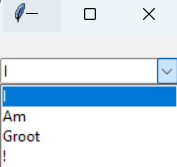

### Initializations

In [ ]:
root = tk.Tk() #Inital
root.title("Combobox Example")
options = ["I", "Am", "Groot", "!"]

### Initializing the combobox with items

**Common KWARGs**
* First value must be whatever name you used to initialize tk.TK()
* exportselection: Boolean value. If set, the widget selection is linked to the Window Manager selection
* justify: Specifies how the text is aligned within the widget. One of “left”, “center”, or “right”.
* height: Specifies the height of the pop-down listbox, in rows.
* postcommand: A script that is called immediately before displaying the values.
* state: One of “normal”, “readonly”, or “disabled”. 
    * In the “readonly” state, the value may not be edited directly, and the user can only selection of the values from the dropdown list. 
    * In the “normal” state, the text field is directly editable. 
    * In the “disabled” state, no interaction is possible.
* textvariable: Specifies a name whose value is linked to the widget value. Whenever the value associated with that name changes, the widget value is updated, and vice versa. See tkinter.StringVar.
* values: Specifies the list of values to display in the drop-down listbox.
* width: Specifies an integer value indicating the desired width of the entry window, in average-size characters of the widget’s font.

In [ ]:
combo = ttk.Combobox(root, values=options)

If newindex is specified, sets the combobox value to the element position newindex. Otherwise, returns the index of the current value or -1 if the current value is not in the values list.

In [ ]:
combo.current(0)

Pack is an additional class used to place your widgets in a desired location

**Common KWARGs**
* padx, pady: Specify external padding around the widget in pixels (horizontal and vertical, respectively). This creates space between the widget and other widgets or the parent's edge.
* expand: A boolean value (True or False). If True, the widget expands to fill any available space in its parent not used by other widgets. This is essential for fill='y' or fill='both' to work as expected for vertical expansion.
* anchor: Controls where the widget is placed within the space allocated to it by the packer when expand is False or the widget doesn't fill the entire space. It takes values like 'n', 's', 'e', 'w', 'nw', 'ne', 'sw', 'se', or 'center' (default), representing compass directions.

In [ ]:
combo.pack(pady=20)

This is a function created so that once a change is detected (the next block of code) it has something to execute

Note combo.get(). Get returns the current value of the combobox

In [ ]:
def on_select(event):
    print("Combobox selected:", combo.get())

bind connects the virtual event of the combobox where the user selects an element from the list of values, to a function

In [ ]:
combo.bind("<<ComboboxSelected>>", on_select)

mainloop is what runs the window that opens

In [ ]:
root.mainloop()

Full example code

In [12]:
root = tk.Tk()
root.title("Combobox Example")

options = ["I", "Am", "Groot", "!"]
combo = ttk.Combobox(root, values=options)
combo.current(0)  # set default selection (by index)
combo.pack(pady=20) # This is how its packed in the windwos so its adding buffers on either side

def on_select(event):
    print("Combobox selected:", combo.get())

combo.bind("<<ComboboxSelected>>", on_select)

root.mainloop()

## Simple Slider

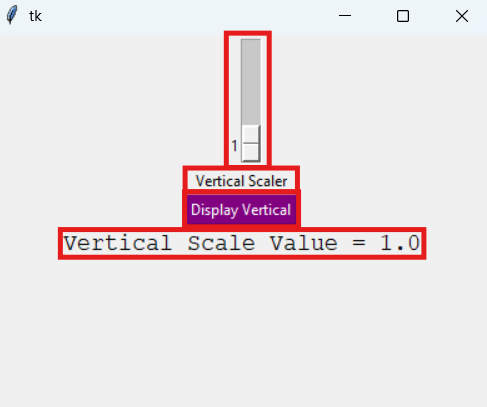

### Initializations

We have to initialize a varriable for the slider called tk.DoubleVar() since Tkinter requires a dynamic variable not just a normal int, double, or float to store the value of a slider

In [ ]:
root = tk.Tk()  
root.geometry("400x300") 
v2 = tk.DoubleVar()

This is a function that is being created to show the value and setting the configuration for l2 (the label box)

In [ ]:
def show2():
    
    sel = "Vertical Scale Value = " + str(v2.get()) 
    l2.config(text = sel, font =("Courier", 14))

### Defining the scale (the slider) 

**Important KWARGs**
* First value must be whatever name you used to initialize tk.TK()
* from_: The starting value of the scale. (Note the underscore to avoid conflict with Python's from keyword).
* to: The ending value of the scale.
* orient: The orientation of the scale, either tk.HORIZONTAL or tk.VERTICAL.
* length: The length of the scale in pixels.
* width: The width of the trough part of the widget.
* sliderlength: The length of the slider handle.
* resolution: The increment by which the scale's value changes when the slider is moved.
* command: A function to be called whenever the scale's value changes. The function receives the new value as an argument.
* showvalue: A boolean (0 or 1) indicating whether the current value should be displayed next to the slider.
* label: A string to display as a label above or beside the scale.
* bg: or background: The background color of the widget.
* fg: or foreground: The foreground color of the widget (e.g., for the label and value).
* font: The font to use for text displayed on the scale.

In [ ]:
s2 = tk.Scale( root, variable = v2,
           from_ = 50, to = 1,
           orient = tk.VERTICAL) 

### Initializes a label

**Common KWARGs**
* First value must be whatever name you used to initialize tk.TK()
* text: The text string to be displayed on the label.
* font: Specifies the font style, size, and weight (e.g., ("Arial", 12, "bold")).
* padx: Horizontal padding inside the label, between the text/image and the border.
* pady: Vertical padding inside the label, between the text/image and the border.
* justify: How multiple lines of text are aligned (e.g., "left", "center", "right").
* image: An PhotoImage object to display an image on the label.
* state: The state of the label (e.g., "normal", "disabled").

In [ ]:
l4 = tk.Label(root, text = "Vertical Scaler")

### Initializing Button

**Common KWARGs**
* First value must be whatever name you used to initialize tk.TK()
* text: The text displayed on the button.
* image: An image to display on the button (instead of or in addition to text).
* compound: Specifies how the image and text are arranged (e.g., tk.LEFT, tk.RIGHT, tk.TOP, tk.BOTTOM, tk.CENTER).
* font: The font used for the button's text.
* bd (borderwidth): The width of the button's border.
* padx: Horizontal padding inside the label, between the text/image and the border.
* pady: Vertical padding inside the label, between the text/image and the border.
* width: The width of the button
* height: The height of the button

In [ ]:
b2 = tk.Button(root, text ="Display Vertical",
            command = show2,
            bg = "purple", 
            fg = "white")

Initializing a second label that will be updating throughout

In [ ]:
l2 = tk.Label(root)

### Packs each of the widgets into the window

**Common KWARGs**
* padx, pady: Specify external padding around the widget in pixels (horizontal and vertical, respectively). This creates space between the widget and other widgets or the parent's edge.
* expand: A boolean value (True or False). If True, the widget expands to fill any available space in its parent not used by other widgets. This is essential for fill='y' or fill='both' to work as expected for vertical expansion.
* anchor: Controls where the widget is placed within the space allocated to it by the packer when expand is False or the widget doesn't fill the entire space. It takes values like 'n', 's', 'e', 'w', 'nw', 'ne', 'sw', 'se', or 'center' (default), representing compass directions.

In [ ]:
s2.pack(anchor = tk.CENTER) 
l4.pack()
b2.pack()
l2.pack()

root.mainloop()

Full Code

In [ ]:
root = tk.Tk()
root.geometry("400x300")
v2 = tk.DoubleVar()

def show2():
    
    sel = "Vertical Scale Value = " + str(v2.get()) 
    l2.config(text = sel, font =("Courier", 14))

s2 = tk.Scale(root, variable = v2,
           from_ = 50, to = 1,
           orient = tk.VERTICAL) 

l4 = tk.Label(root, text = "Vertical Scaler")

b2 = tk.Button(root, text ="Display Vertical",
            command = show2,
            bg = "purple", 
            fg = "white")

l2 = tk.Label(root)

s2.pack(anchor = tk.CENTER) 
l4.pack()
b2.pack()
l2.pack()

root.mainloop()

## Simple Frame Menu

In [5]:
# Function to create widgets with all options
def create_widget(parent, widget_type, **options):
    return widget_type(parent, **options)

# Create the main window
window = create_widget(None, tk.Tk)
window.title("GUI Example")

# Create a Frame widget with all options
frame = create_widget(window, tk.Frame, bg='lightblue', bd=3, cursor='hand2', height=100, 
                      highlightcolor='red', highlightthickness=2, highlightbackground='black', 
                      relief=tk.RAISED, width=200)
frame.pack(padx=20, pady=20)

# Create Label widget with all options
label = create_widget(frame, tk.Label, text='GeeksForGeeks', font='50', bg='lightblue', bd=3, cursor='hand2',
                      highlightcolor='red', highlightthickness=2, highlightbackground='black', 
                      relief=tk.RAISED)
label.pack()

# Create a frame for buttons
button_frame = create_widget(window, tk.Frame, bg='lightblue', bd=3, cursor='hand2', height=50, 
                              highlightcolor='red', highlightthickness=2, highlightbackground='black', 
                              relief=tk.RAISED, width=200)
button_frame.pack(pady=10)

# Function to create buttons with all options
def create_button(parent, text, fg):
    return create_widget(parent, tk.Button, text=text, fg=fg, bg='lightblue', bd=3, cursor='hand2',
                         highlightcolor='red', highlightthickness=2, highlightbackground='black', 
                         relief=tk.RAISED)

# Create buttons
buttons_info = [("Geeks1", "red"), ("Geeks2", "brown"), ("Geeks3", "blue"), 
                ("Geeks4", "green"), ("Geeks5", "green"), ("Geeks6", "green")]

for text, fg in buttons_info:
    button = create_button(button_frame, text=text, fg=fg)
    button.pack(side=tk.LEFT)

# Run the Tkinter event loop
window.mainloop()

## Our Heat Transfer Example

In [ ]:
import tkinter as tk
from tkinter import ttk

# ================================================================
# WINDOW AND FRAME SETUP
# ================================================================
WINDOW_WIDTH, WINDOW_HEIGHT = 600, 600

root = tk.Tk()
root.title("S.S. 1D Heat Transfer Simulation")
root.geometry(f"{WINDOW_WIDTH}x{WINDOW_HEIGHT}")

main_window = ttk.Frame(master=root, borderwidth=5, relief='ridge', width=0.9*WINDOW_WIDTH, height=WINDOW_HEIGHT)
bottom_frame = ttk.Frame(master=main_window, borderwidth=5, relief='ridge', width=0.9*WINDOW_WIDTH, height=1/4*WINDOW_HEIGHT)
inputs_frame = ttk.Frame(master=bottom_frame)
materials_frame = ttk.Frame(master=bottom_frame)
outputs_frame = ttk.Frame(master=bottom_frame)

# ================================================================
# CANVAS DRAWING
# ================================================================
LEFT_GAP, RIGHT_GAP = 0.05, 0.20
canvas_width = 0.9 * WINDOW_WIDTH
canvas_height = 2/3 * WINDOW_HEIGHT

canvas = tk.Canvas(master=main_window, width=canvas_width, height=canvas_height, bg='white')
canvas.grid(row=0, column=0)

N_WALLS = 2
left_margin = LEFT_GAP * canvas_width
right_margin = RIGHT_GAP * canvas_width
wall_width = (canvas_width - left_margin - right_margin) / N_WALLS
top, bottom = 0.1 * canvas_height, 0.9 * canvas_height

# ================================================================
# TEMPERATURE VARIABLES
# ================================================================
T_min, T_max = 0, 1000
T_values = [200, 999, 50]  # initial T1, T2, T3

T1_var = tk.IntVar(value=400)
T2_var = tk.DoubleVar(value=0)
T3_var = tk.DoubleVar(value=0)
T_inf_var = tk.DoubleVar(value=300.0)
h_var = tk.DoubleVar(value = 25.0)

k_constants = {'Wood':0.16, 'Brick':0.72, 'Steel':60.5}
MATERIAL_OPTIONS = ['Wood', 'Brick', 'Steel']
wall_vars = [tk.StringVar(value='Wood') for _ in range(N_WALLS)]
A = 2.0
L = 1.5

def temperature_calcs():
    T1 = float(T1_var.get())
    T_inf = float(T_inf_var.get())
    h = float(h_var.get())
    k1 = k_constants[wall_vars[0].get()]
    k2 = k_constants[wall_vars[1].get()]
    
    R1 = L / (k1*A)
    R2 = L / (k2*A)
    R_conv = 1/(h*A)
    R_tot = R1+R2+R_conv
    q = (T1 - T_inf)/R_tot
    T2 = T1 - q*R1
    T3 = T1 - q*(R1+R2)
    T_values[0] = T1
    T_values[1] = T2
    T_values[2] = T3
    T2_var.set(T2)
    T3_var.set(T3)
    return q, R1, R2, R_conv

# ================================================================
# COLOR AND GRADIENT FUNCTIONS
# ================================================================
def temp_to_color(T):
    """Map temperature to RGB color (blue=cold, red=hot)."""
    ratio = (T - T_min) / (T_max - T_min)
    ratio = max(0.0, min(1.0, ratio))  # clamp to [0,1]

    r = int(255 * ratio)
    g = 0
    b = int(255 * (1 - ratio))
    
    r = max(0, min(255, r))
    b = max(0, min(255, b))

    return f"#{r:02x}{g:02x}{b:02x}"

def draw_horizontal_gradient_rect(x1, y1, x2, y2, T_start, T_end, steps=50):
    """
    Draw a rectangle with a horizontal gradient from T_start (left) to T_end (right)
    """
    width = x2 - x1
    step_width = width / steps
    for i in range(steps):
        x_left = x1 + i * step_width
        x_right = x1 + (i + 1) * step_width
        # interpolate temperature
        T = T_start + (T_end - T_start) * (i / steps)
        color = temp_to_color(T)
        canvas.create_rectangle(x_left, y1, x_right, y2, outline="", fill=color)

   
def redraw_walls(*args):
    """Clear canvas and redraw walls with updated temperatures."""
    canvas.delete("all")  # remove old drawings

    # Compute updated temps from slider
    q, R1, R2, Rconv = temperature_calcs()

    # Draw walls
    for i in range(N_WALLS):
        x1 = left_margin + i * wall_width
        x2 = x1 + wall_width
        draw_horizontal_gradient_rect(x1, top, x2, bottom, T_values[i], T_values[i+1])
        canvas.create_text(x1 + 8, (top + bottom)/2, text=f"T{i+1}", fill="black", anchor="w")
        canvas.create_text((x1 + x2)/2, bottom + 15, text=f"L = 1.5 m", fill="black")
        
        # Draw the wall edge
        canvas.create_rectangle(x1, top, x2, bottom, outline="black", width=2, fill="")

    # Labels
    canvas.create_text(left_margin + N_WALLS * wall_width + 8, (top + bottom)/2,
                       text=f"T{N_WALLS+1}", fill="black", anchor="w")
    canvas.create_text(left_margin - 10, (top + bottom)/2, text=f"A = 2.0 m²", fill="black", angle=90)

    # Convection arrows
    arrow_x = left_margin + N_WALLS * wall_width + right_margin / 2
    n_arrows = 4
    arrow_spacing = (bottom - top) / (n_arrows + 1)
    arrow_length = 25
    for i in range(n_arrows):
        y = bottom - (i + 1) * arrow_spacing
        canvas.create_line(arrow_x, y + arrow_length/2, arrow_x, y - arrow_length/2,
                           arrow=tk.LAST, width=2, fill="royalblue")
    canvas.create_text(arrow_x + 15, (top + bottom)/2, text="Convection (T∞), h = 25 W⋅m⁻²K⁻¹",
                       angle=90, fill="royalblue")
    
    T2_label.config(text=f"T2: {T2_var.get():.2f} K")
    T3_label.config(text=f"T3: {T3_var.get():.2f} K")

# ================================================================
# WIDGETS
# ================================================================
t1_label = tk.Label(master=inputs_frame, text="T1 (K):")
t1_scale = tk.Scale(master=inputs_frame, from_=1000, to=0, orient=tk.VERTICAL, variable=T1_var)
tinf_label = tk.Label(master=inputs_frame, text='T∞:')
tinf_entry = tk.Entry(master=inputs_frame, textvariable=T_inf_var, width=10)
tinf_units = tk.Label(master=inputs_frame, text='K')
T2_label = tk.Label(master=outputs_frame, text=f"T2: {T2_var.get()} K")
T3_label = tk.Label(master=outputs_frame, text=f"T3: {T3_var.get()} K")

material_labels = [tk.Label(master=materials_frame, text=f"Wall {i+1} Material:") for i in range(N_WALLS)]
material_menus = [ttk.Combobox(master=materials_frame, values=MATERIAL_OPTIONS,
                               textvariable=wall_vars[i], state='readonly', width=8) for i in range(N_WALLS)]

# ================================================================
# WIDGET PLACEMENT
# ================================================================
main_window.grid(row=0, column=0, padx=15, pady=5)
bottom_frame.grid(row=1, column=0)
inputs_frame.grid(row=0, column=0, padx=10)
materials_frame.grid(row=0, column=1, padx=20)
outputs_frame.grid(row=0, column=2, padx=20)

t1_label.grid(row=0, column=0)
t1_scale.grid(row=1, column=0, padx=(0,20))
tinf_label.grid(row=0, column=1, padx=(15,5))
tinf_entry.grid(row=0, column=2)
tinf_units.grid(row=0, column=3)

for i in range(N_WALLS):
    material_labels[i].grid(row=i, column=0, sticky='e')
    material_menus[i].grid(row=i, column=1, padx=5)

T2_label.grid(row=0, column=0, padx=10)
T3_label.grid(row=1, column=0, padx=10)

# ================================================================
# CONNECT SLIDER TO REDRAW
# ================================================================
T1_var.trace_add("write", redraw_walls)
T_inf_var.trace_add("write", lambda *a: redraw_walls())
h_var.trace_add("write", lambda *a: redraw_walls())
for menu in material_menus:
    menu.bind("<<ComboboxSelected>>", lambda e: redraw_walls())

# Initial draw
redraw_walls()

# ================================================================
# START GUI
# ================================================================
root.mainloop()


## Acknowledgements
Credit GeeksforGeeks for example code, TKinter Python Wiki for class and function information, israel dryer ttkbootstrap for the everything bagel example, and Bernd Klein from python-courses.eu for the game_of_life_example.py

https://www.geeksforgeeks.org/python/python-tkinter-tutorial/

https://docs.python.org/3/library/tkinter.html

https://github.com/israel-dryer/ttkbootstrap

https://python-course.eu/tkinter/the-game-of-life-in-python.php